<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


## Lab: Collect Jobs Data using GitHub Jobs API


### Objective: Determine the number of jobs currently open for various technologies


In [23]:
#Import required libraries
import requests 
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"
response = requests.get(baseurl)
data = response.json()


In [12]:
data = df = pd.DataFrame(data)
data.rename(columns={"A": "technology", "B": "number of job posting"},inplace=True) 
data[(data["technology"] != "technology") & (data["number of job posting"] != "number of job posting")]
data['number of job posting'] = data['number of job posting'].astype(int)

data

,technology,number of job posting
0,java,1
1,C,10
2,C#,1
3,C++,1
4,Java,2
...,...,...
251,C#,1
252,PostgreSQL,1
253,MongoDB,1
254,Scala,2


In [13]:
def get_number_of_jobs(technology):
    number_of_jobs = data.groupby('technology').sum().loc[technology,:][0]
    return technology,number_of_jobs

Call the API for all the given technologies above and write the results in an excel spreadsheet.


In [15]:
technologies = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']


Import libraries required to create excel spreadsheet


In [16]:
!pip3 install openpyxl
from openpyxl import Workbook

Create a workbook and select the active worksheet


In [17]:
wb = Workbook()
ws = wb.active

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [18]:
ws.append(['Tech','Num'])
for job in technologies:
    value = list(get_number_of_jobs(job))
    ws.append(value)

Save into an excel spreadsheet named 'github-job-postings.xlsx'.


In [19]:
wb.save("github-job-postings.xlsx")

In [21]:
df = pd.read_excel("github-job-postings.xlsx")
df.sort_values(by = ['Num'], axis = 0, ascending = False, inplace = True)
df.set_index('Tech', inplace=True)
df.head()

,Num
Tech,
C,184
Java,83
JavaScript,65
Python,51
Scala,47


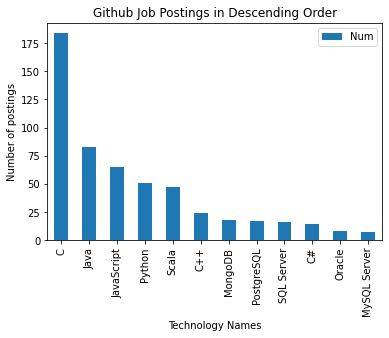

In [25]:
df.plot(kind = 'bar', label = True)
plt.title("Github Job Postings in Descending Order")
plt.xlabel("Technology Names")
plt.ylabel("Number of postings")

plt.show()

In [ ]:
## Authors

Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2021-6-25         | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
